In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Sistema de ecuaciones

### Parámetros originales

In [70]:
def f_x(x,y):
    return ((1.2 * x) - (0.6 * x * y))

def f_y(x,y):
    return ((0.3 * x * y) - (0.8 * y))

### Parámetros duplicados

In [71]:
def f_x_2(x,y):
    return ((2.4 * x) - (1.2 * x * y))

def f_y_2(x,y):
    return ((0.6 * x * y) - (1.6 * y))

# Método de resolución de ecuaciones diferenciales ordinarias

In [72]:
def RK_orden4(x_inicial, y_inicial, t_inicial, t_final, paso, funcion_x, funcion_y):
    cantidad_muestras = int((t_final - t_inicial) / paso + 1)
    resultado_x = [x_inicial]
    resultado_y = [y_inicial]
    
    for n in range(cantidad_muestras - 1):
                
        k1_x = paso * funcion_x(resultado_x[n], resultado_y[n])
        k1_y = paso * funcion_y(resultado_x[n], resultado_y[n])
        
        k2_x = paso * funcion_x(resultado_x[n] + (k1_x * 0.5), resultado_y[n] + (k1_y * 0.5))
        k2_y = paso * funcion_y(resultado_x[n] + (k1_x * 0.5), resultado_y[n] + (k1_y * 0.5))
        
        k3_x = paso * funcion_x(resultado_x[n] + (k2_x * 0.5), resultado_y[n] + (k2_y * 0.5))
        k3_y = paso * funcion_y(resultado_x[n] + (k2_x * 0.5), resultado_y[n] + (k2_y  * 0.5))
        
        k4_x = paso * funcion_x(resultado_x[n] + (k3_x), resultado_y[n] + (k3_y))
        k4_y = paso * funcion_y(resultado_x[n] + (k3_x), resultado_y[n] + (k3_y))
        
        x_siguiente = resultado_x[n] + ((1/6) * (k1_x + 2 * k2_x + 2 * k3_x + k4_x))
        y_siguiente = resultado_y[n] + ((1/6) * (k1_y + 2 * k2_y + 2 * k3_y + k4_y))
        
        resultado_x.append(x_siguiente)
        resultado_y.append(y_siguiente)
        
    return resultado_x, resultado_y

### Funciones auxiliares

In [73]:
def cantidad_de_pasos(t_inicial, t_final, paso):
    return np.arange(t_inicial, t_final + paso, paso)


In [75]:
def buscar_maximo(vec):
    len_vec = len(vec)
    for i in range(1, len_vec - 1):
        if vec[i] > vec[i-1] and vec[i] > vec[i+1]:
            return vec[i], i

In [76]:
def calcular_periodo(vec, paso):
    maximo_1, index_1 = buscar_maximo(vec)
    maximo_2, index_2 = buscar_maximo(vec[index_1 + 1::])
    return index_2 * paso
    

In [77]:
def graficar_soluciones(it_x, it_y, pasos):
    ax = plt
    ax.figure(figsize=[16,9])

    ax.plot(pasos, it_x, label="Presa")
    ax.plot(pasos, it_y, label="Predador")
    ax.grid()
    ax.legend()

    plt.show()

In [78]:
def graficar_interaccion_presa_predador(presa, predador, eq_presa, eq_predador):
    ax = plt
    ax.figure(figsize=[16,9])
    ax.plot(predador, presa, label="Interaccion")
    ax.plot(eq_predador, eq_presa, 'o', linewidth=2, label="Equilibrio")
    ax.axis([0, 4, 0, 6])
    ax.grid()
    ax.legend()
    
    plt.show()

## Ítem A

In [79]:
t0 = 0
tf = 30
x0 = 2
y0= 1
h = 0.1

iteraciones_x, iteraciones_y = RK_orden4(x0, y0, t0, tf, h, f_x, f_y)
pasos = cantidad_de_pasos(t0, tf, h)

## Ítem B

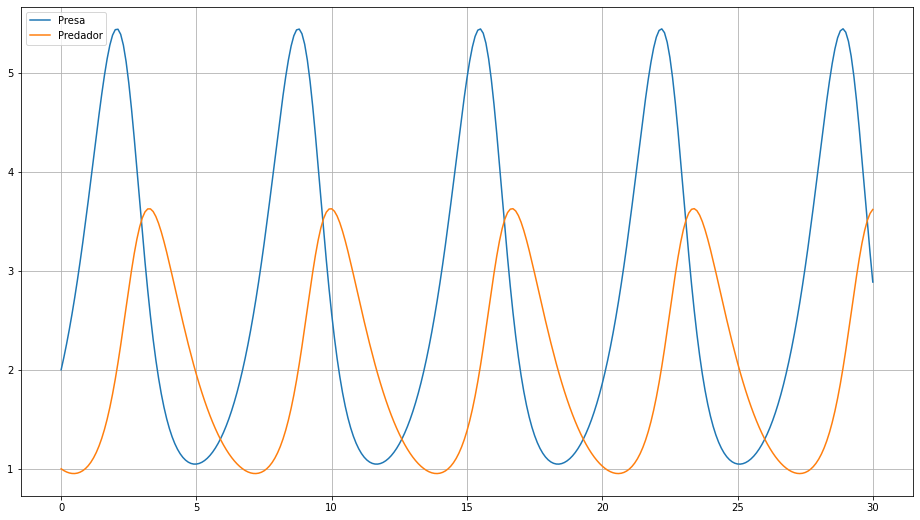

In [80]:
graficar_soluciones(iteraciones_x, iteraciones_y, pasos)

## Ítem C

In [81]:
t0 = 0
tf = 30
x0 = 2
y0= 1
h = 0.1

iteraciones_x, iteraciones_y = RK_orden4(x0, y0, t0, tf, h, f_x_2, f_y_2)
pasos = cantidad_de_pasos(t0, tf, h)

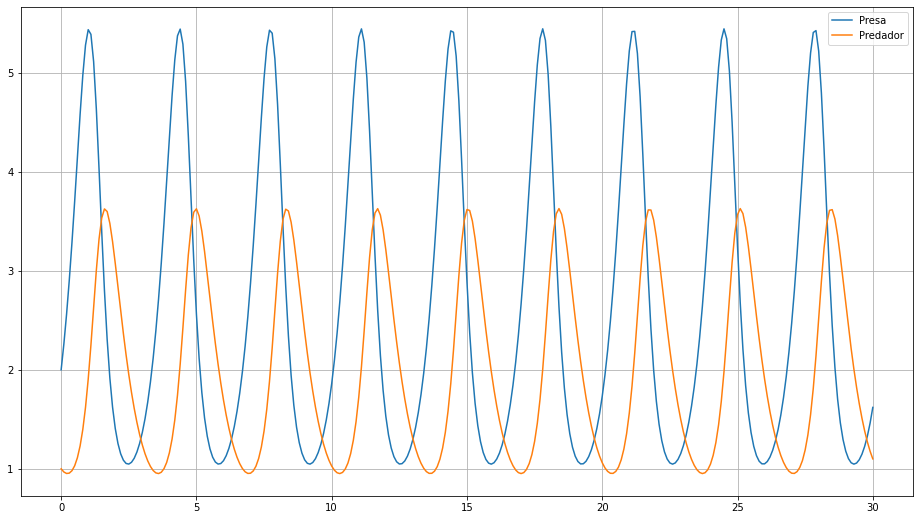

In [82]:
graficar_soluciones(iteraciones_x, iteraciones_y, pasos)

## Ítem D

In [83]:
a = 1.2
b = 0.6
c = 0.8
d = 0.3

t0 = 0
tf = 30
x0 = c/d
y0= a/b
h = 0.1

equilibrio_x, equilibrio_y = RK_orden4(x0, y0, t0, tf, h, f_x_2, f_y_2)

x0 = 2
y0= 1
iteraciones_x, iteraciones_y = RK_orden4(x0, y0, t0, tf, h, f_x_2, f_y_2)

## Ítem E

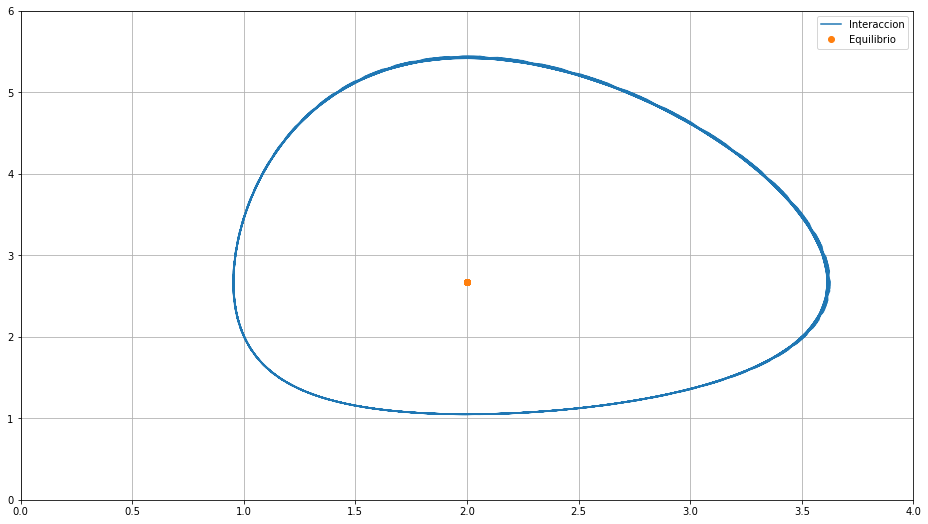

In [84]:
graficar_interaccion_presa_predador(iteraciones_x, iteraciones_y, equilibrio_x, equilibrio_y)

In [89]:
a = 1.2
b = 0.6
c = 0.8
d = 0.3

t0 = 0
tf = 30
x0 = c/d
y0= a/b
h = 0.1

equilibrio_x, equilibrio_y = RK_orden4(x0, y0, t0, tf, h, f_x, f_y)

x0 = 2
y0= 1
iteraciones_x, iteraciones_y = RK_orden4(x0, y0, t0, tf, h, f_x, f_y)

## Programa interactivo

In [87]:
def programa_interactivo(fx, fy):
    x0 = float(input('Ingrese las condiciones iniciales en X: '))
    y0 = float(input('Ingrese las condiciones iniciales en Y: '))
    h = .1
    t0 = 0
    tf = 20
    iteraciones_x, iteraciones_y = RK_orden4(x0, y0, t0, tf, h, f_x, f_y)
    pasos = cantidad_de_pasos(t0, tf, h)
    graficar_soluciones(iteraciones_x, iteraciones_y, pasos)

In [86]:
programa_interactivo(f_x, f_y)

Ingrese las condiciones iniciales en X2
Ingrese las condiciones iniciales en Y1
